In [32]:
# This is a notebook to perform spectral extraction at specific location/region from JWST MIRI/MRS cubes
# and fit it with CAFE

In [ ]:
import os
os._exit(00)

In [1]:
import sys
# Include the path to the folder where CAFE and CRETA have been installed. Usually it's one level up from the notebook/ folder.
sys.path.insert(0, '../CRETA/')
sys.path.insert(0, '../CAFE/')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# NAME OF GALAXY
gal_name = 'NGC7469'

In [3]:
# SPECTRAL EXTRACTION
import creta
creta_dir = '../CRETA/'

User API Created


In [4]:
# Read parameter file with extraction keywords
param_fn = gal_name+'_MIRI_single_params.txt'
pf = open(creta_dir+'param_files/'+param_fn,'r')
print(pf.read())
pf.close()

cubes = ch1-short, ch1-medium, ch1-long, ch2-short, ch2-medium, ch2-long, ch3-short, ch3-medium, ch3-long, ch4-short, ch4-medium, ch4-long
user_r_ap = 0.3                 # [arcsec] Aperture size
user_ra = 23h03m15.614s         # RA of the extraction location
user_dec = 08d52m26.09s         # Dec of the extraction location
point_source = False            # [True/False] True = Cone extraction. False = Cylinder extraction
lambda_ap = 5.4                 # [microns] The user-specified aperture size (user_r_ap) will be defined at this wavelength (ignored if point_source=False; cylinder extraction)
aperture_correction = False     # [True/False]
centering = False                # [True/False] At lambda_cent, this will update user_ra,user_dec to recenter the extraction location  
lambda_cent = 5.4               # [microns] The wavelength at which to perform the centering (ignored if centering=False)
background_sub = False          # [True/False]
r_ann_in = 0.0                  # [arcsec] When

In [5]:
# Load the extraction tool (CRETA)
c = creta.creta(creta_dir)

CAFE Region Extraction Tool Automaton (CRETA) initialized


In [6]:
# Perform the extraction
c.singleExtraction(parameter_file=True, parfile_name=param_fn, data_path=creta_dir+'data/'+gal_name+'/', output_filebase_name=gal_name)

User API Created
PSFs: ../CRETA/PSFs/
Data: ../CRETA/data/NGC7469/
########################################
     Load User Parameters 
########################################
Cubes: ['ch1-short', 'ch1-medium', 'ch1-long', 'ch2-short', 'ch2-medium', 'ch2-long', 'ch3-short', 'ch3-medium', 'ch3-long', 'ch4-short', 'ch4-medium', 'ch4-long']
Aperture radii: [0.3] (arcsec)
RA,δ: [345.81505833,8.87391389] (degrees)
Point Source: False
Aperture Correction: False (PSF Correction)
Centering: False
Centering lambda: 5.4μm
Background Subtraction: False
PSF sub-cubes Path: ../CRETA/PSFs/
Data sub-cubes Path: ../CRETA/data/NGC7469/
########################################
Loading Data
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_miri-mrs_ngc7469_ch1-short_v2.0_sci.fits
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_miri-mrs_ngc7469_ch1-medium_v2.0_sci.fits
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_miri-mrs_ngc7469_ch1-long_v2.0_sci.fits
Load file: ../CRETA/data/NGC7469/hlsp_goals_jwst_

ch1_SHORT photometry exectued in: 1.0338091850280762 seconds
ch1_MEDIUM photometry exectued in: 1.0306951999664307 seconds
ch1_LONG photometry exectued in: 1.2692899703979492 seconds
ch2_SHORT photometry exectued in: 0.8415360450744629 seconds
ch2_MEDIUM photometry exectued in: 1.1614599227905273 seconds
ch2_LONG photometry exectued in: 0.8995687961578369 seconds
ch3_SHORT photometry exectued in: 0.7069540023803711 seconds
ch3_MEDIUM photometry exectued in: 0.7889308929443359 seconds
ch3_LONG photometry exectued in: 0.8506240844726562 seconds
ch4_SHORT photometry exectued in: 0.5353260040283203 seconds
ch4_MEDIUM photometry exectued in: 0.6633968353271484 seconds
ch4_LONG photometry exectued in: 0.7283093929290771 seconds
Photometry exectued in': 10.528120994567871 seconds
Initiating stitching process
Stitch ratios: [[0.9869973797468217, 1.0011744541738135, 0.8802117995443295, 1.0146796010212187, 1.0056951469774265, 0.7788479217592289, 0.9824617474477211, 0.9663249371349304, 0.81310995

In [7]:
# The spectrum/spectra are extracted.

In [4]:
# SPECTRAL FITTING
import cafe_io
from cafe_io import *
import cafe_helper
import cafe
cafe_dir = '../CAFE/'

In [5]:
# Setup data directory and file name, and parameter files.
source_fd = creta_dir+'extractions/'
source_fn = gal_name+'_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_miri_AGN.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.01623

In [6]:
# Load CAFE
s = cafe.specmod(cafe_dir)

In [7]:
# Read the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (9284,)   float64   
  2  ERR           1 ImageHDU         7   (9284,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (9284,)   float64   
  4  ERR_ST        1 ImageHDU         7   (9284,)   float64   
  5  DQ            1 ImageHDU         7   (9284,)   float64   
  6  WAVE          1 ImageHDU         7   (9284,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   9284R x 1C   [20A]   


Generating continuum profiles for guess model from the .ini file
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
AGN
AGN
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


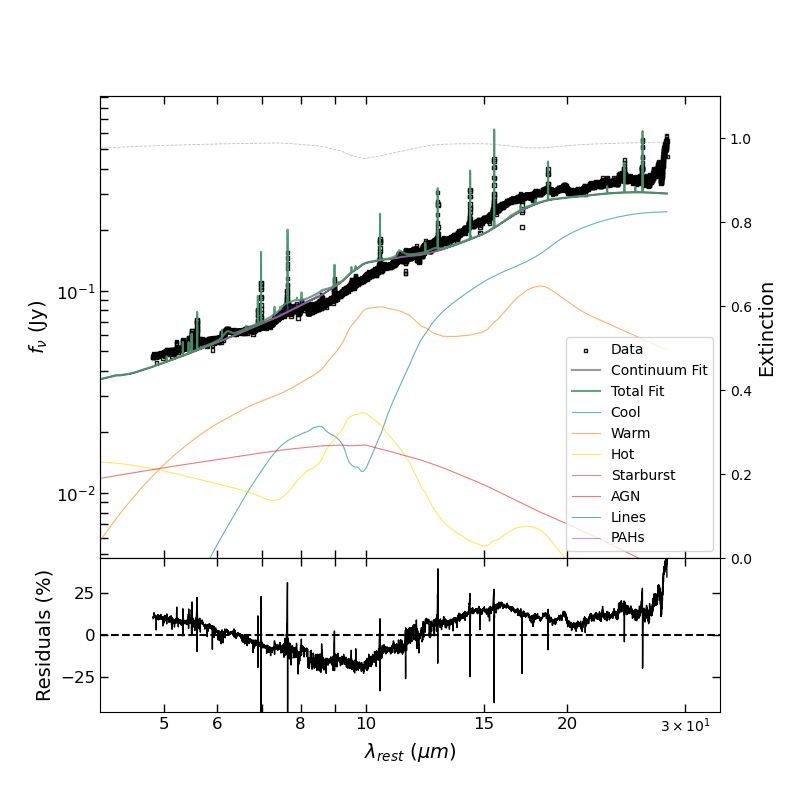

In [8]:
# Plot initial model
s.plot_spec_ini(inppar_fn, optpar_fn)

In [9]:
# Fit spectrum
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter cube with initial/full parameter object
Parameter object has 67 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.47 seconds to make continnum profiles
Fitting 277 parameters
Iteration 1/5(max): 2023-05-05 18:15:26.226690 -----------------
True in 44 steps
110.04 seconds elapsed
No errors retuned
<Parameter 'HOT_TAU', value=3.3938764041254188e-15, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_FLX', value=1.9999918941125323, bounds=[0.0:2.0]> at upper bound, fixing to  2.0
<Parameter 'STB_TAU', value=1.354391326478813e-13, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_010', value=0.9999999999572902, bounds=[0.0:1.0]> at upper bound, fixing to  1.0
<Parameter 'DSK_FLX', value=6.2788271938812005e-31, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Paramet

2023-05-05 18:17:27,582 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/asdf/entry_points.py:49: AsdfWarning: asdf.resource_mappings plugin from package asdf==2.8.1 failed to load:

AttributeError: module 'asdf.resource' has no attribute 'get_core_resource_mappings'
  warnings.warn(

2023-05-05 18:17:27,760 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:17:27,789 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:17:27,828 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
 

In [10]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-7.431384428643259
-2.478780663323302e-05


AGN
AGN
ISRF
ISRF


2023-05-05 18:23:33,236 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



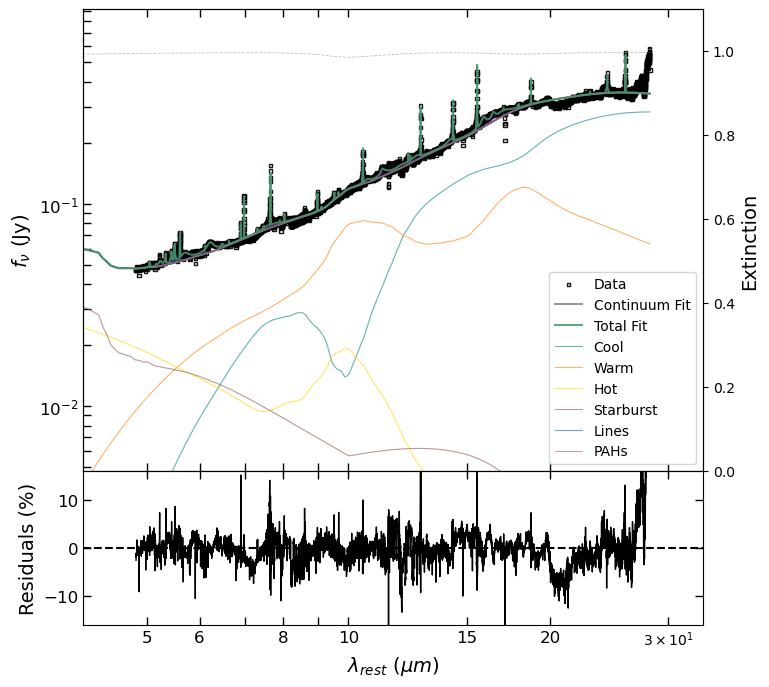

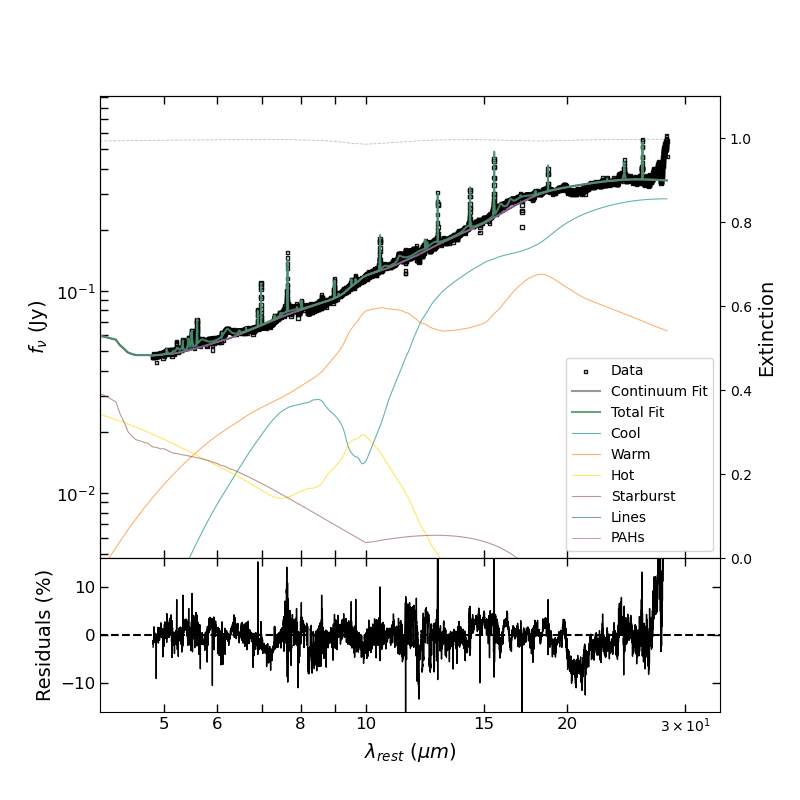

In [11]:
# Plot fitted spectrum
s.plot_spec_fit(inppar_fn, optpar_fn)

In [12]:
########### Starting a CAFE session from scratch ###############

parcube_fd = '../CAFE/output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [13]:
# Load the the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (9284,)   float64   
  2  ERR           1 ImageHDU         7   (9284,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (9284,)   float64   
  4  ERR_ST        1 ImageHDU         7   (9284,)   float64   
  5  DQ            1 ImageHDU         7   (9284,)   float64   
  6  WAVE          1 ImageHDU         7   (9284,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   9284R x 1C   [20A]   


In [14]:
# Load the parameter cube from disk
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


AGN
AGN
ISRF
ISRF


2023-05-05 18:23:45,257 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



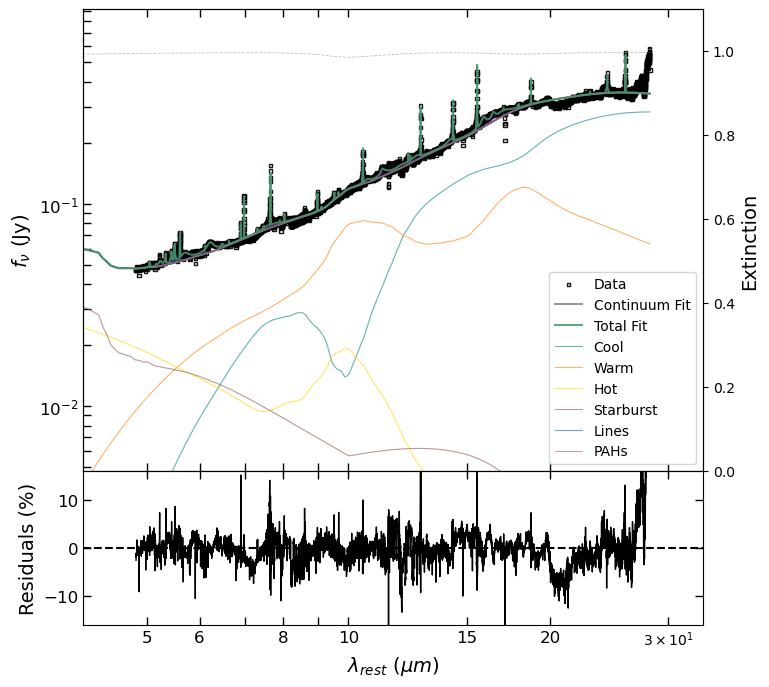

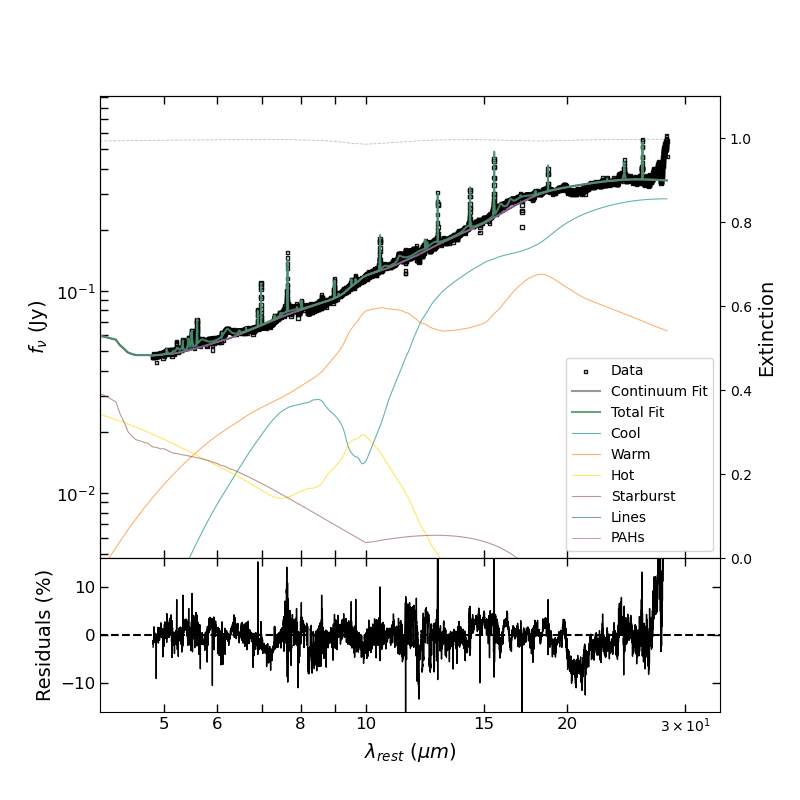

In [15]:
# Plot the previous fit
s.plot_spec_fit(inppar_fn, optpar_fn)

In [16]:
# One may want to fit again the spectrum but using as an initial guess the result from the fit of another spectrum
# (or from a previous fit from the same spectrum, although this is not recommended as most parameters have been already optimized and that gives trouble to LMFIT)
# For this example case, nevertheless, we use the previous fit from the same spectrum

In [17]:
# Note this is technically unnecessary if the initalization is done with the same spectrum, since the parameter cube is already loaded in s.parcube, but for completeness:
ini = cafe.specmod(cafe_dir)
ini.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


Generating continuum profiles for guess model from the .ini file
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The initial parameters will be set to the values from the parameter cube provided
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
AGN
AGN
ISRF
ISRF


2023-05-05 18:23:57,496 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



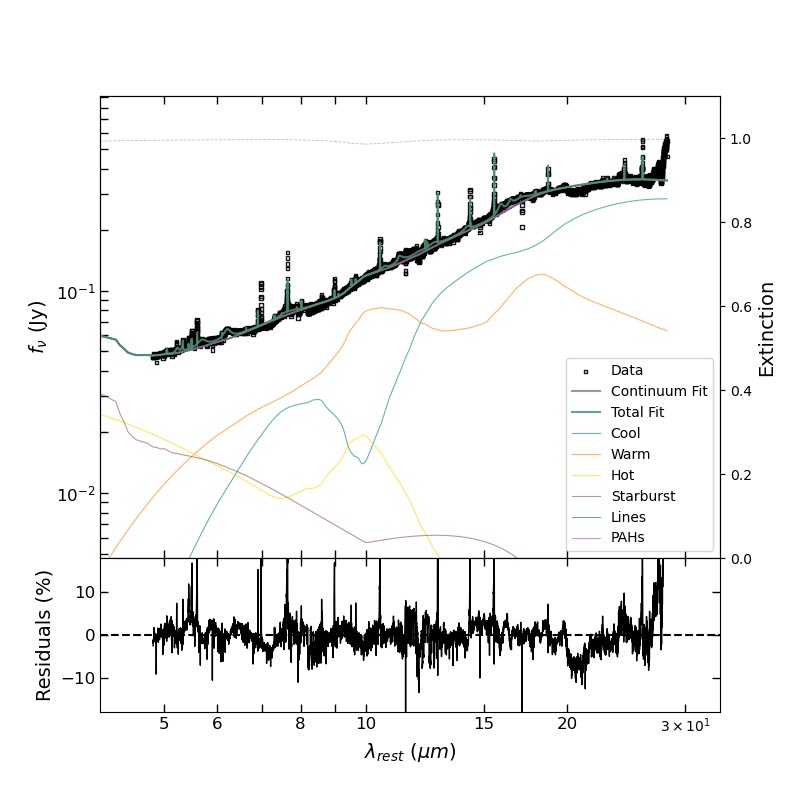

In [18]:
# Plot the initialized spectrum (should be the same as the fitted spectrum above)
s.plot_spec_ini(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

In [19]:
# Refit using the last fit results as initialization
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

Generating parameter cube with initial/full parameter object
Parameter object has 67 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.17 seconds to make continnum profiles
Fitting 277 parameters
Iteration 1/5(max): 2023-05-05 18:24:09.737568 -----------------
True in 24 steps
63.63 seconds elapsed
No errors retuned
<Parameter 'HOT_TAU', value=1.8741080300593576e-13, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_FLX', value=1.9999999563928796, bounds=[0.0:2.0]> at upper bound, fixing to  2.0
<Parameter 'STB_FLX', value=1.9999999563928796, bounds=[0.0:2.0]> at initial value 2.0 . Fixing value.
<Parameter 'STB_TAU', value=3.

2023-05-05 18:25:28,943 - stpipe - WARNING - /Users/tanio/Sync/pywork/CAFE/notebooks/../CAFE/cafe.py:591: ResourceWarning: unclosed file <_io.BufferedReader name='../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits'>
  self.parcube = parcube



Saving parameters in cube to disk: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube
Saving parameters in asdf to disk: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_cafefit


2023-05-05 18:25:29,508 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:25:29,532 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:25:29,555 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:25:29,573 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, 

In [20]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-1.661844899343753
-5.543178450112584e-06


AGN
AGN
ISRF
ISRF


2023-05-05 18:25:54,651 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



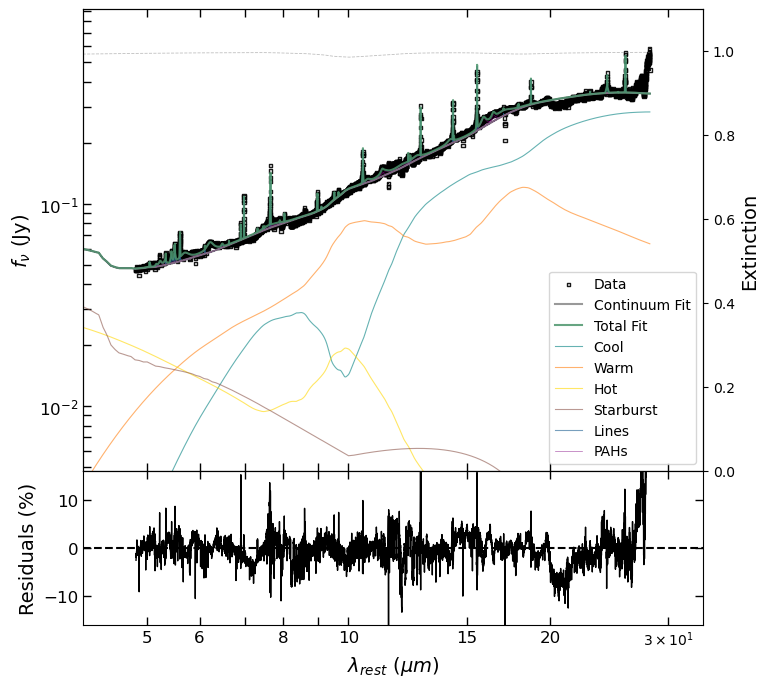

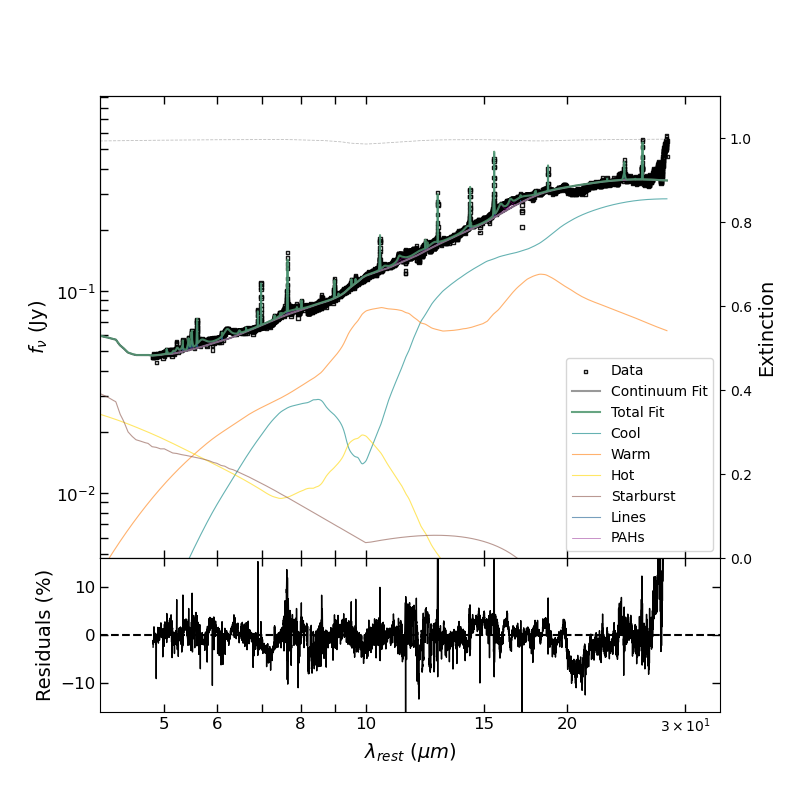

In [21]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [22]:
# We can iterate ad infinitum, but it's probably for the worse since the fit has probably converged already
ini2 = cafe.specmod(cafe_dir)
ini2.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 319)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 319)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 319)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 319)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 319)   float64   
  6  EXPR          1 BinTableHDU     13   319R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   319R x 2C   [I, 32A]   


In [23]:
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini2.parcube)

Generating parameter cube with initial/full parameter object
Parameter object has 67 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 53 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
4.42 seconds to make continnum profiles
Fitting 277 parameters
Iteration 1/5(max): 2023-05-05 18:27:47.357589 -----------------
True in 21 steps
51.89 seconds elapsed
No errors retuned
<Parameter 'HOT_TAU', value=5.761049890657081e-14, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'STB_FLX', value=1.9999999999960447, bounds=[0.0:2.0]> at upper bound, fixing to  2.0
<Parameter 'STB_FLX', value=1.9999999999960447, bounds=[0.0:2.0]> at initial value 2.0 . Fixing value.
<Parameter 'STB_TAU', value=1.3

2023-05-05 18:28:54,970 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:28:54,990 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:28:55,010 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:28:55,029 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, 

In [24]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

0.007825839617853873
2.6103534415790104e-08


AGN
AGN
ISRF
ISRF


2023-05-05 18:29:14,300 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)



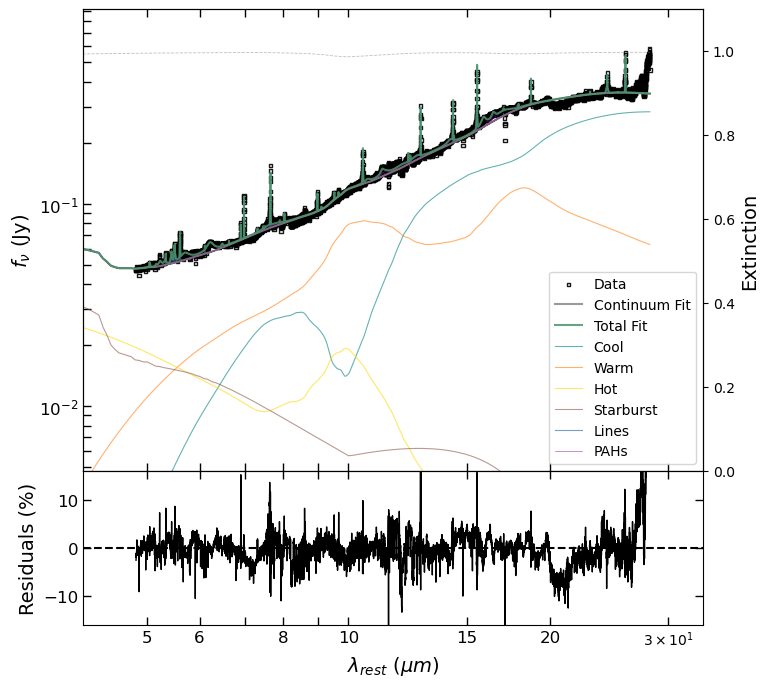

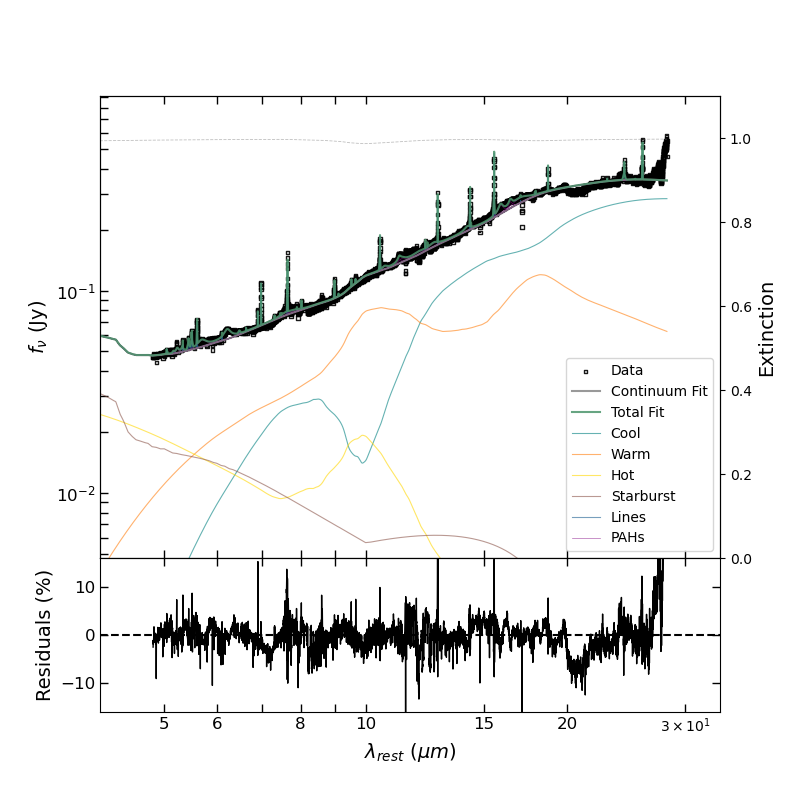

In [25]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [26]:
# Create and write output PAH table
pah = cafe_io.pah_table(s.parcube)
# Create and write output line table
line = cafe_io.line_table(s.parcube)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

2023-05-05 18:29:49,717 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:29:49,745 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:29:49,770 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)

2023-05-05 18:29:49,788 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, 

6.2/7.7 = 1.4546702813772714 +/- 0.09684658873953013
11.3/7.7 = 1.0638233960082915 +/- 0.08010251136163375
             pah_strength  pah_strength_unc
pah_complex                                
PAH113_C     1.120113e-16      8.536545e-18
PAH120       7.521533e-17      8.454401e-18
PAH126_C     1.077789e-16      1.268321e-17
PAH136       0.000000e+00      0.000000e+00
PAH142       8.246195e-17      4.658380e-18
PAH164       7.741190e-17      3.239038e-18
PAH170_C     2.923018e-16      1.236656e-17
PAH62        1.531641e-16      5.776616e-18
PAH77_C      1.052913e-16      1.270942e-17
PAH83        0.000000e+00      0.000000e+00
PAH86        0.000000e+00      0.000000e+00
